In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

a)

In [5]:
# 1. Génération des données
np.random.seed(42)
n = 100
X = np.random.uniform(20, 200, n)                  # superficie
true_intercept, true_slope = 5000, 150
y = true_intercept + true_slope * X + np.random.normal(0, 1000, n)

# 2. Initialisation des paramètres
intercept = 0.0
slope = 0.0

# 3. Hyperparamètres
learning_rate = 1e-5
epochs = 5000

# 4. Descente de gradient
for epoch in range(epochs):
    # Prédictions actuelles
    y_pred = intercept + slope * X
    
    # Erreurs
    error = y_pred - y
    
    # Calcul des gradients (MSE)
    grad_intercept = 2 * error.mean()
    grad_slope = 2 * (error * X).mean()
    
    # Mise à jour des paramètres
    intercept -= learning_rate * grad_intercept
    slope -= learning_rate * grad_slope
    
    # Affichage périodique
    if epoch % 500 == 0:
        loss = (error**2).mean()
        print(f"Epoch {epoch} - Loss: {loss:.2f}")

# 5. Résultats
print(f"Intercept estimé : {intercept:.2f} (vrai = {true_intercept})")
print(f"Slope estimé     : {slope:.2f} (vrai = {true_slope})")


Epoch 0 - Loss: 490754468.31
Epoch 500 - Loss: 6490294.91
Epoch 1000 - Loss: 6466938.44
Epoch 1500 - Loss: 6443677.96
Epoch 2000 - Loss: 6420513.06
Epoch 2500 - Loss: 6397443.36
Epoch 3000 - Loss: 6374468.45
Epoch 3500 - Loss: 6351587.96
Epoch 4000 - Loss: 6328801.49
Epoch 4500 - Loss: 6306108.67
Intercept estimé : 108.71 (vrai = 5000)
Slope estimé     : 186.59 (vrai = 150)


b)

Intercept estimé : 5266.18
Slope estimé     : 147.45


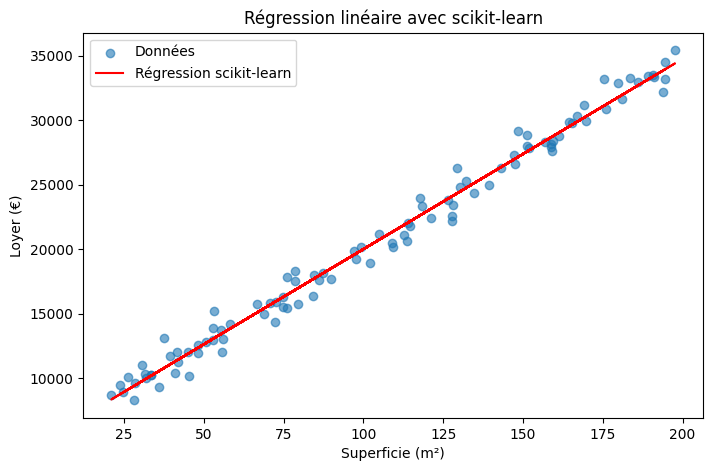

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# scikit-learn attend un tableau 2D pour X
X_2d = X.reshape(-1, 1)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_2d, y)

# Paramètres appris
intercept_est = model.intercept_
slope_est = model.coef_[0]

print(f"Intercept estimé : {intercept_est:.2f}")
print(f"Slope estimé     : {slope_est:.2f}")

# Prédictions
y_pred = model.predict(X_2d)

# Visualisation
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.6, label="Données")
plt.plot(X, y_pred, color='red', label="Régression scikit-learn")
plt.xlabel("Superficie (m²)")
plt.ylabel("Loyer (€)")
plt.title("Régression linéaire avec scikit-learn")
plt.legend()
plt.show()


c)

c:\Users\amkas\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Intercept estimé : 1175.20
Slope estimé     : 480.26
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


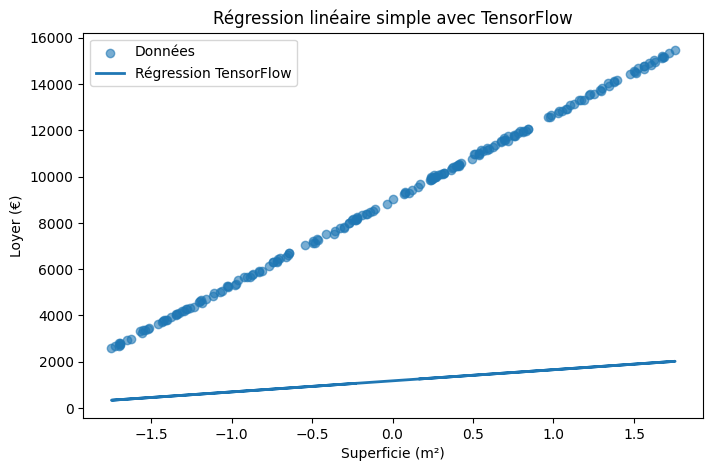

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow attend un tableau 2D pour X
X_tf = X.reshape(-1, 1).astype(np.float32)
y_tf = y.reshape(-1, 1).astype(np.float32)

# 1. Définir le modèle : une couche Dense avec 1 sortie, sans activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compiler le modèle : optimizer + fonction de perte
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5),
              loss='mse')

# 3. Entraîner le modèle
history = model.fit(X_tf, y_tf, epochs=1000, verbose=0)

# 4. Récupérer les poids appris
w1, w0 = model.layers[0].get_weights()  # w1 est un array 2D, w0 est le biais
slope_est = float(w1[0][0])
intercept_est = float(w0[0])

print(f"Intercept estimé : {intercept_est:.2f}")
print(f"Slope estimé     : {slope_est:.2f}")

# 5. Prédictions
y_pred = model.predict(X_tf).flatten()

# 6. Visualisation
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.6, label="Données")
plt.plot(X, y_pred, label="Régression TensorFlow", linewidth=2)
plt.xlabel("Superficie (m²)")
plt.ylabel("Loyer (€)")
plt.title("Régression linéaire simple avec TensorFlow")
plt.legend()
plt.show()
